In [311]:
# import
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [312]:
# Get Data
X_train = pd.read_csv('../data/X_train.csv')
Y_train = pd.read_csv('../data/Y_train.csv')

In [313]:
# Let's see what we have
X_train

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,...,0.509514,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373
1490,1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,...,1.666252,NaN,NaN,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356
1491,748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,...,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,FR,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,...,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812


In [314]:
Y_train

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733
...,...,...
1489,459,-0.172597
1490,1674,-0.063546
1491,748,0.151797
1492,1454,-0.640917


In [315]:
print(f"features: {X_train.shape[1]}")
print(f"size: {X_train.shape[0]}")

features: 35
size: 1494


We have too much features in our dataset compare to the number of samples. We will try various technique to shrink the number of features. We will try to use the following techniques:
    - See the variance of each feature. See if there is many outliers.
    - We can then use PCA to produce decorrelated features. We can then select the most important features aka the one with the highest variance.
    - We can also use a Lasso regression to select the most important features.
    - We can visualize features distribution using t-SNE to better understand the data.

/var/folders/k7/5bqh6vbs2jg9btyl5pw1cyqr0000gn/T/ipykernel_99598/455551202.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  var = X_train.var()


<AxesSubplot: >

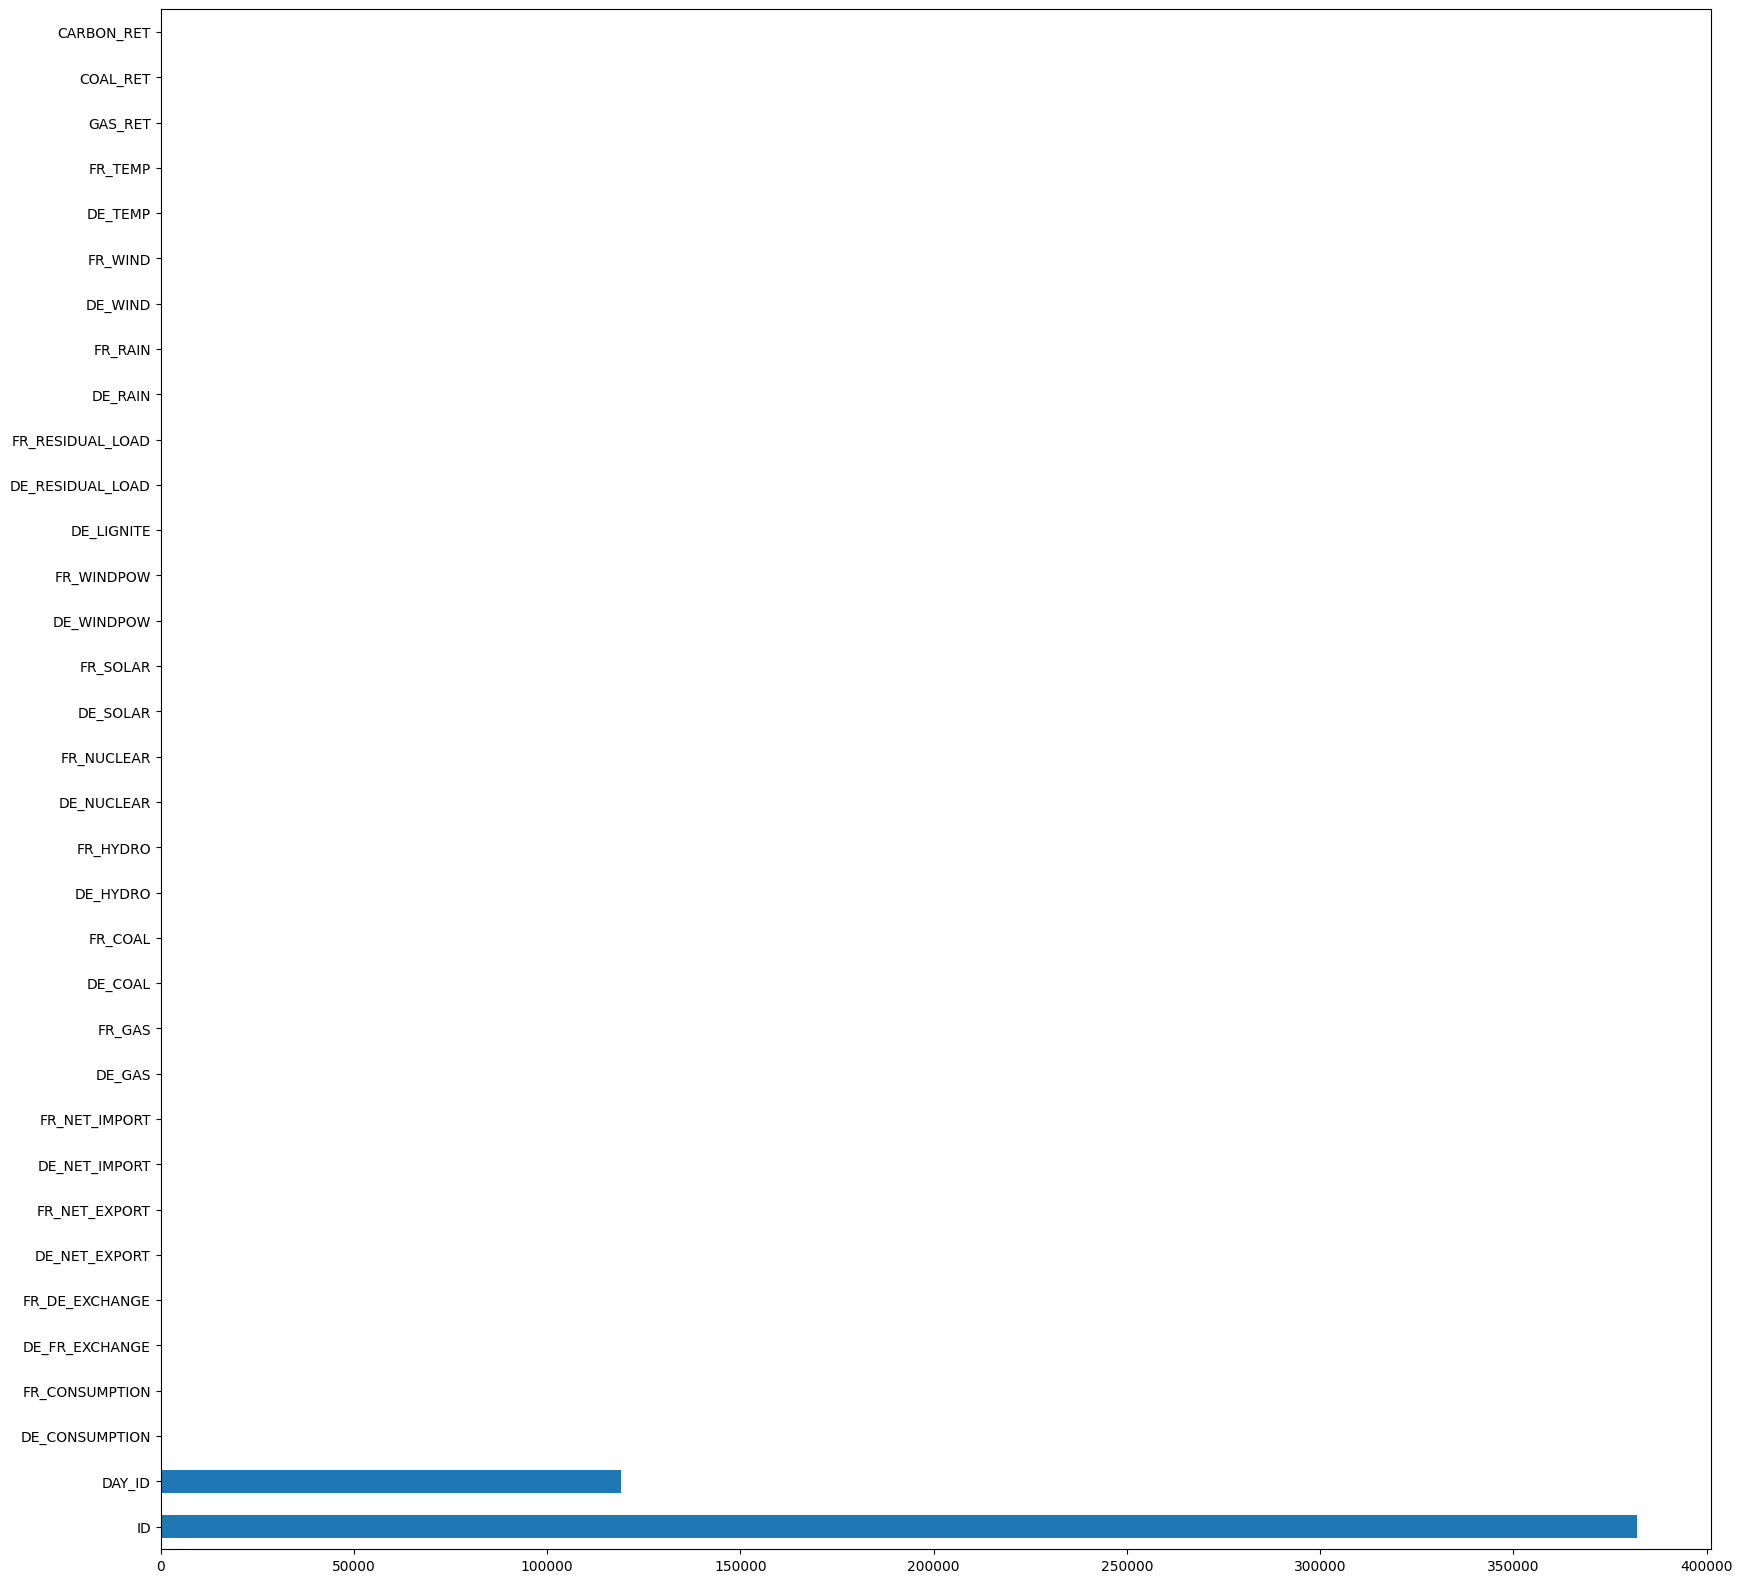

In [316]:
# Get Variance of each feature
var = X_train.var()

plt.figure(figsize=(20, 20))
var.plot(kind='barh')

/var/folders/k7/5bqh6vbs2jg9btyl5pw1cyqr0000gn/T/ipykernel_99598/3942653745.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  var = X_train.drop(['ID', 'DAY_ID'], axis=1).var()


<AxesSubplot: >

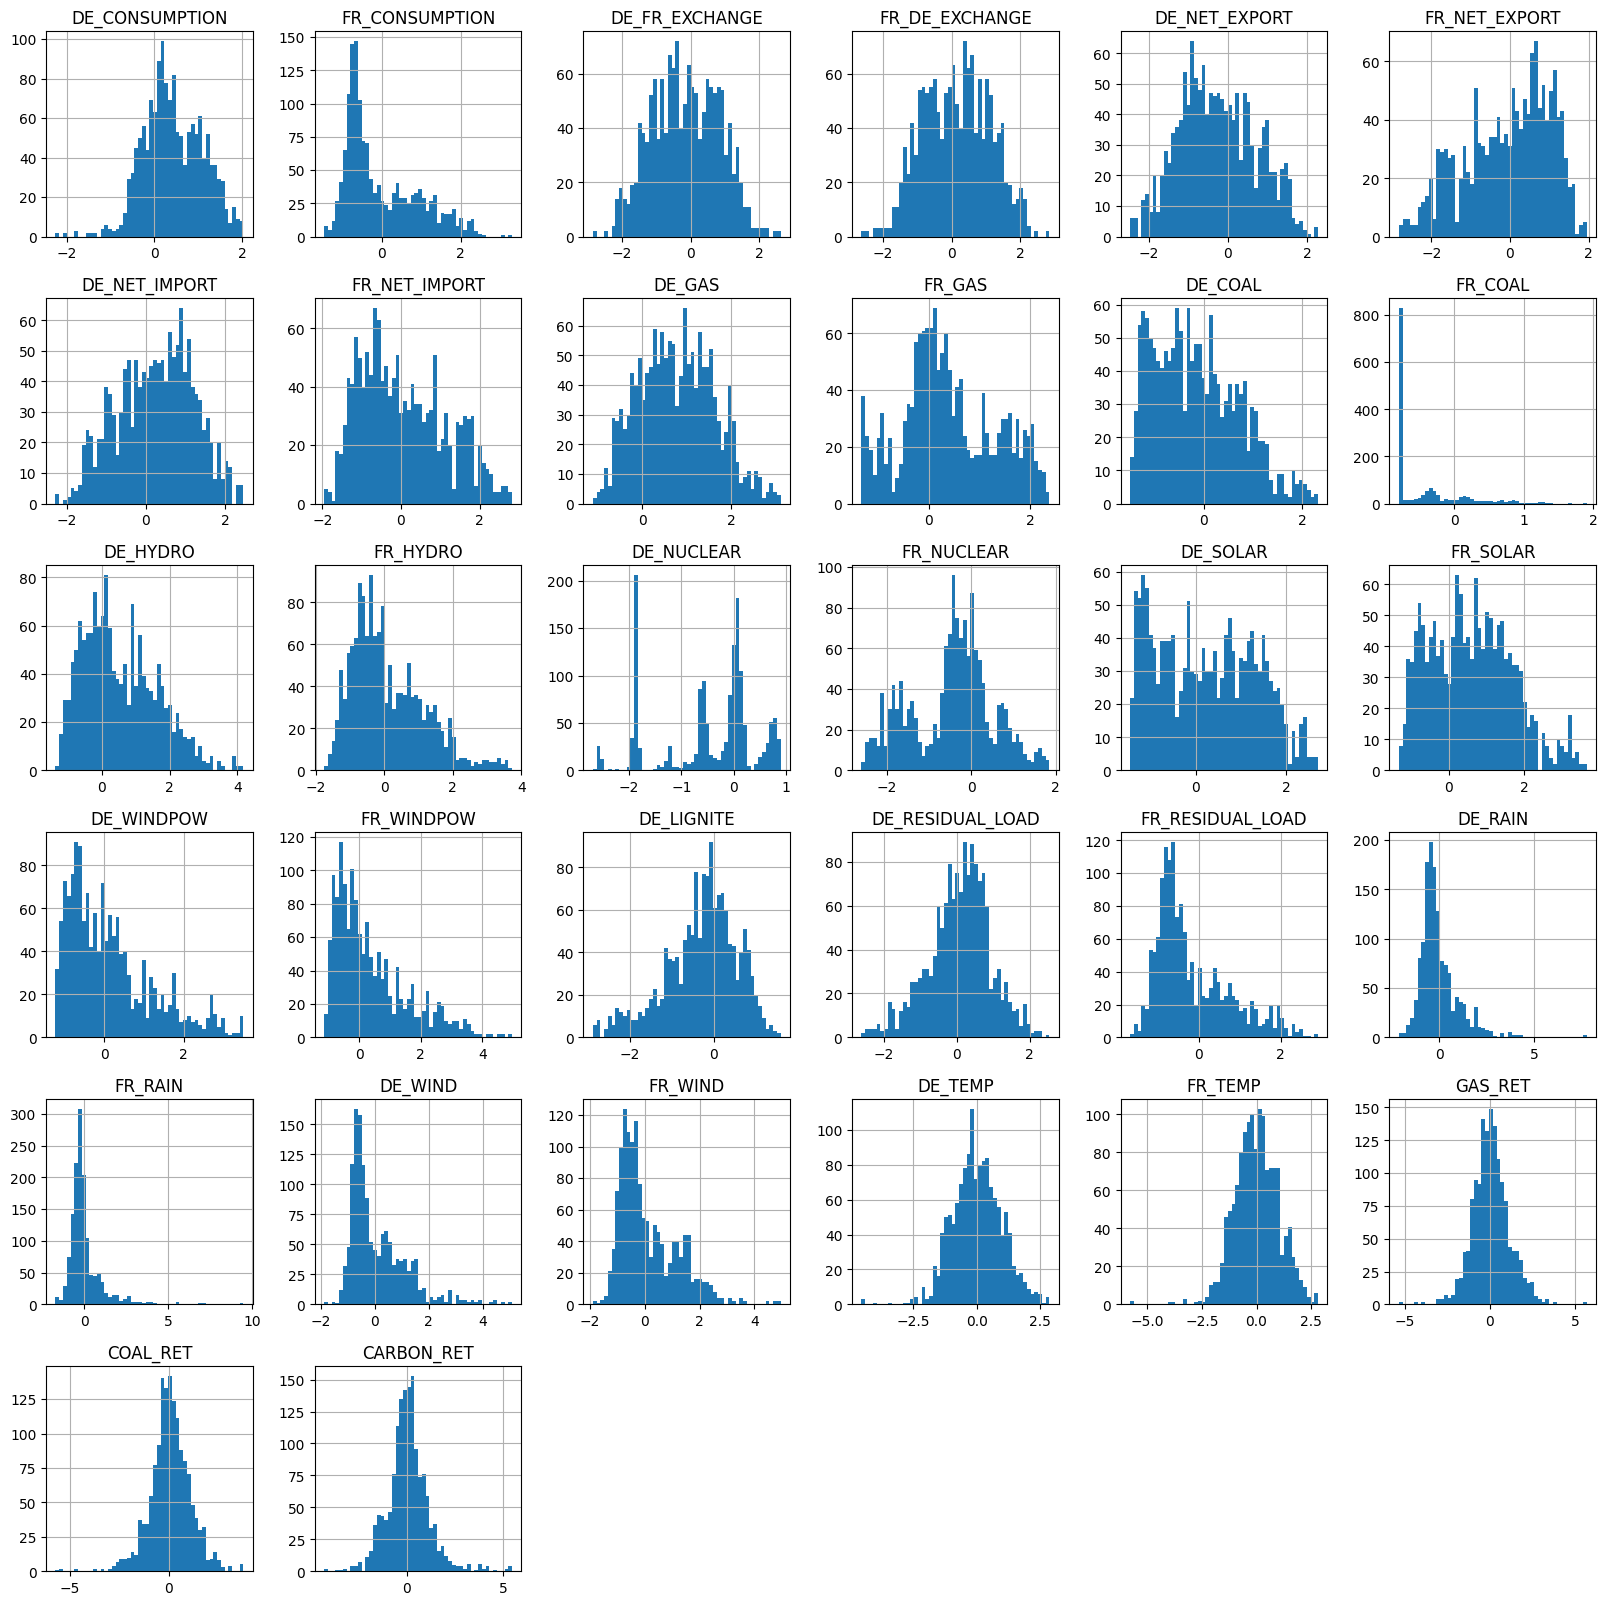

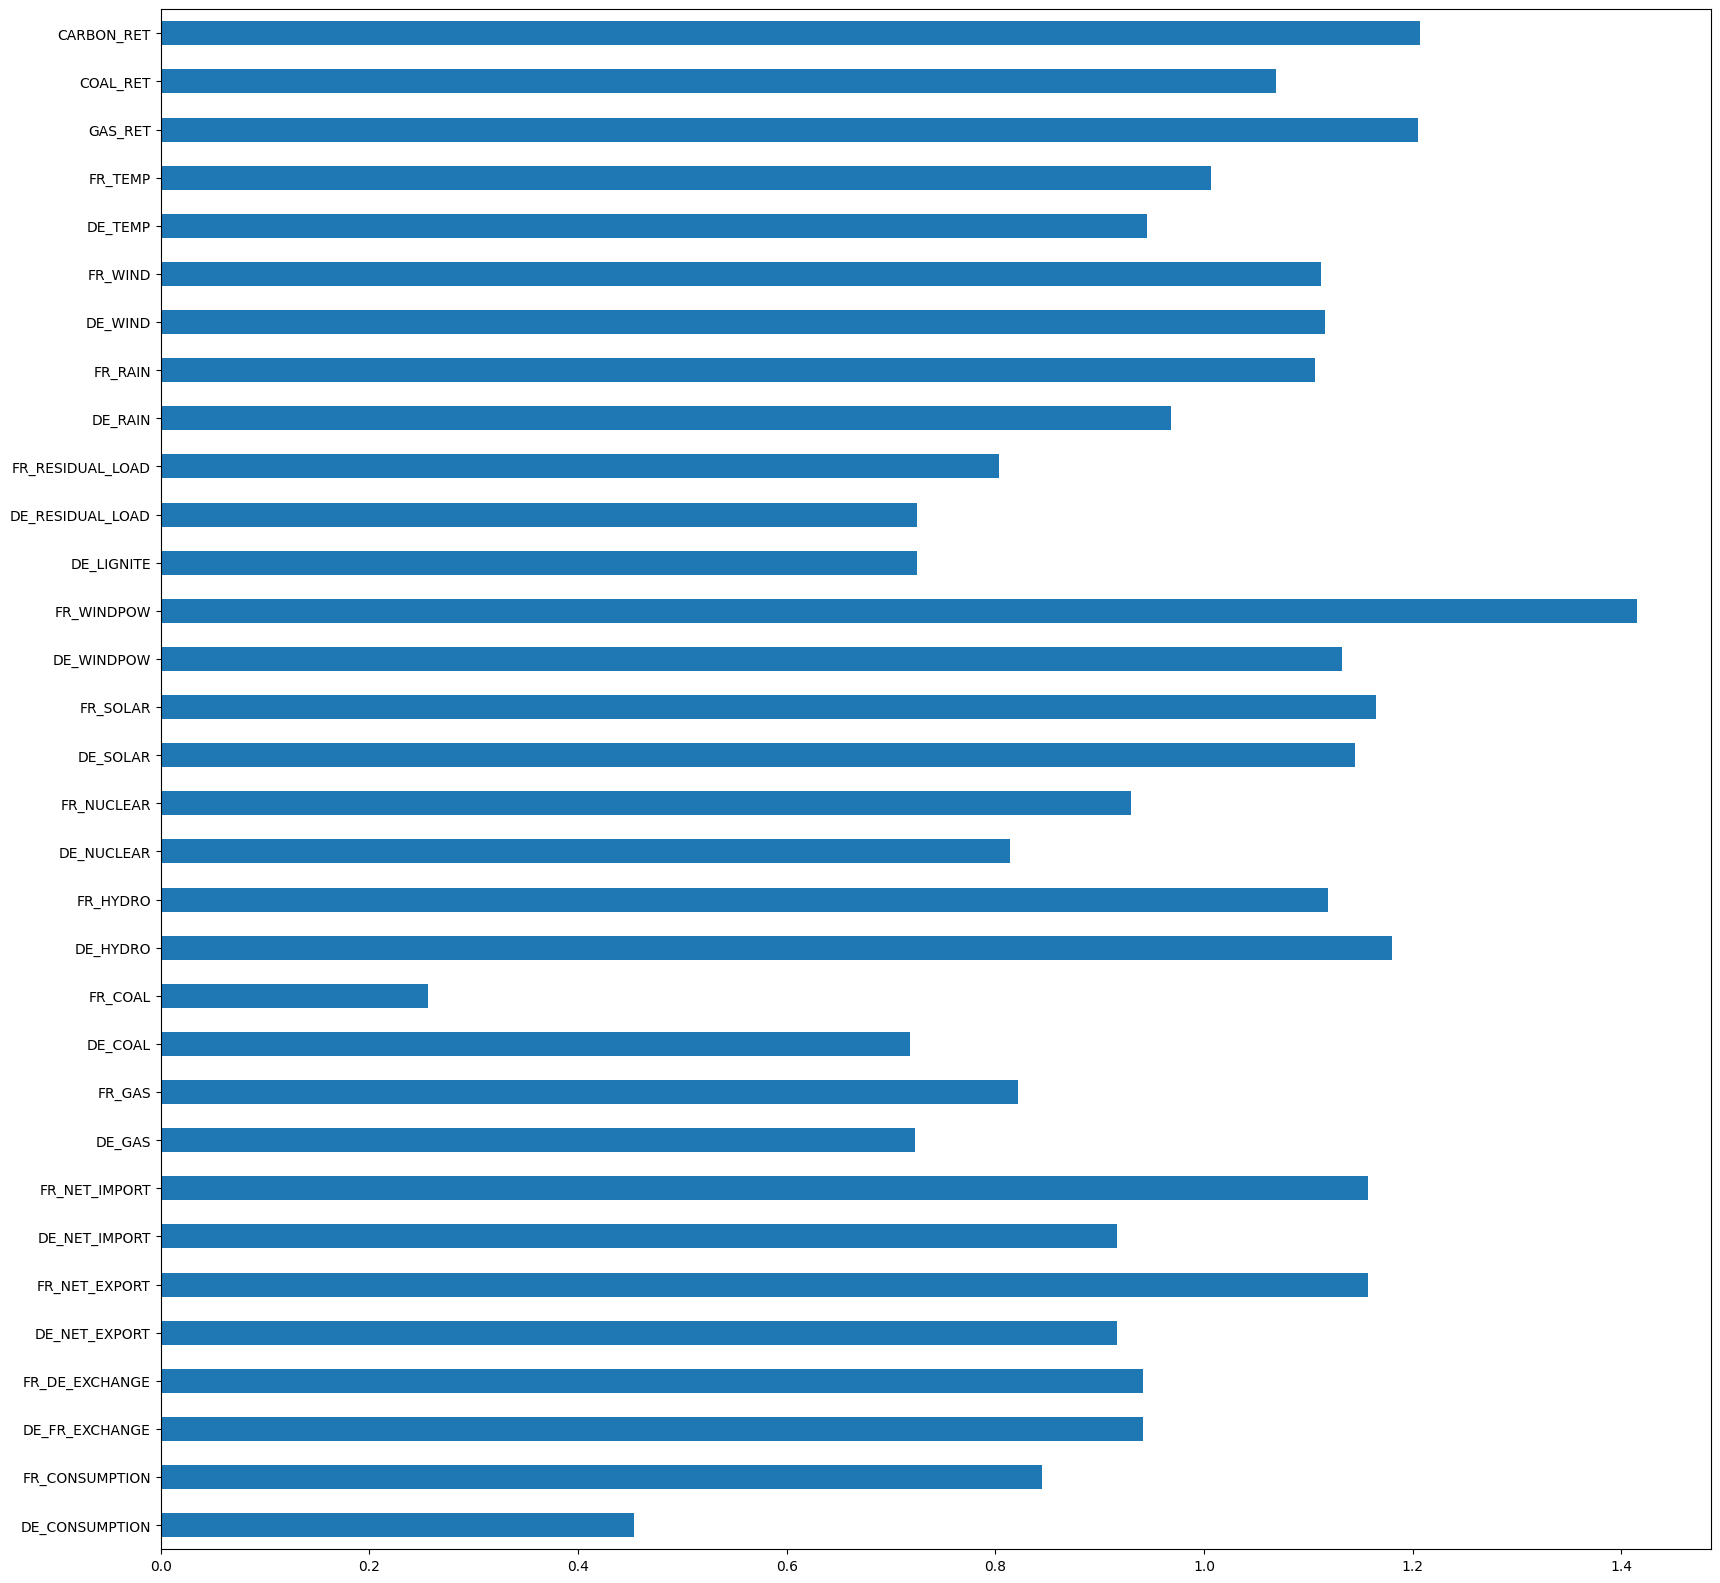

In [317]:
# Let's visualize it as an histogram. We need to remove ID and Day_ID as it's not relevant to check their variance
X_train.drop(['ID', 'DAY_ID'], axis=1).hist(figsize=(20, 20), bins=50)
var = X_train.drop(['ID', 'DAY_ID'], axis=1).var()

plt.figure(figsize=(20, 20))
var.plot(kind='barh')

In [318]:
# Let's check the matrix of correlation between features
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/k7/5bqh6vbs2jg9btyl5pw1cyqr0000gn/T/ipykernel_99598/376388715.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corr()


,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
ID,1.000000,-0.003997,0.025814,-0.011666,0.180030,-0.180030,0.039558,-0.218016,-0.039558,0.218016,-0.060744,0.046807,0.114359,0.048710,-0.094262,-0.123134,-0.240712,-0.161465,0.032281,0.111630,0.021833,0.021685,0.056032,-0.030912,-0.029327,-0.014931,-0.001059,0.253715,0.264618,0.033234,0.050398,0.010915,-0.000254,0.010874
DAY_ID,-0.003997,1.000000,-0.019309,0.011148,0.022606,-0.022606,0.038967,0.009467,-0.038967,-0.009467,-0.051674,-0.019301,-0.001295,-0.002387,-0.052383,0.028892,0.032436,0.030522,-0.034702,-0.016858,0.032612,-0.004287,-0.030083,-0.036880,0.013965,0.020619,-0.025018,0.013443,-0.003037,-0.004084,0.025111,-0.039608,-0.029103,0.004774
DE_CONSUMPTION,0.025814,-0.019309,1.000000,0.813202,0.423988,-0.423988,0.541806,-0.131230,-0.541806,0.131230,0.233345,0.632066,0.455872,0.522945,-0.365692,0.394448,0.240710,0.607209,-0.640844,-0.575092,0.475986,0.385231,0.345409,0.218227,0.754142,0.134564,0.060984,0.212596,0.117079,0.072598,-0.126963,-0.033043,0.051972,0.007704
FR_CONSUMPTION,-0.011666,0.011148,0.813202,1.000000,0.496264,-0.496264,0.545595,-0.229635,-0.545595,0.229635,0.378877,0.779727,0.478193,0.580789,-0.422262,0.619409,0.309959,0.705734,-0.690640,-0.653394,0.359452,0.330130,0.327708,0.277634,0.965086,0.043571,0.027627,0.019971,-0.034988,-0.028137,-0.203533,-0.077751,0.021745,-0.041451
DE_FR_EXCHANGE,0.180030,0.022606,0.423988,0.496264,1.000000,-1.000000,0.703962,-0.677812,-0.703962,0.677812,0.030742,0.470966,0.408725,0.393705,-0.321357,0.026476,-0.123121,0.037243,-0.277557,-0.160628,0.391002,0.061308,0.222586,-0.119661,0.492296,-0.052472,-0.015864,0.376970,0.224083,0.035462,-0.028449,-0.030188,-0.039373,-0.012279
FR_DE_EXCHANGE,-0.180030,-0.022606,-0.423988,-0.496264,-1.000000,1.000000,-0.703962,0.677812,0.703962,-0.677812,-0.030742,-0.470966,-0.408725,-0.393705,0.321357,-0.026476,0.123121,-0.037243,0.277557,0.160628,-0.391002,-0.061308,-0.222586,0.119661,-0.492296,0.052472,0.015864,-0.376970,-0.224083,-0.035462,0.028449,0.030188,0.039373,0.012279
DE_NET_EXPORT,0.039558,0.038967,0.541806,0.545595,0.703962,-0.703962,1.000000,-0.225742,-1.000000,0.225742,-0.214147,0.338565,0.170232,0.295130,-0.454639,0.071758,0.163989,0.348366,-0.466975,-0.439192,0.763398,0.408305,0.069592,-0.403423,0.463496,0.082798,0.084615,0.341156,0.133387,0.122451,0.037351,-0.078395,-0.021797,-0.077238
FR_NET_EXPORT,-0.218016,0.009467,-0.131230,-0.229635,-0.677812,0.677812,-0.225742,1.000000,0.225742,-1.000000,-0.262132,-0.474671,-0.395053,-0.265217,0.151674,0.112903,0.465452,0.458742,0.031812,-0.117399,-0.008827,0.142062,-0.268712,-0.072347,-0.257547,0.130920,0.061026,-0.280048,-0.221902,0.009143,0.031076,0.035636,0.018354,-0.024568
DE_NET_IMPORT,-0.039558,-0.038967,-0.541806,-0.545595,-0.703962,0.703962,-1.000000,0.225742,1.000000,-0.225742,0.214147,-0.338565,-0.170232,-0.295130,0.454639,-0.071758,-0.163989,-0.348366,0.466975,0.439192,-0.763398,-0.408305,-0.069592,0.403423,-0.463496,-0.082798,-0.084615,-0.341156,-0.133387,-0.122451,-0.037351,0.078395,0.021797,0.077238
FR_NET_IMPORT,0.218016,-0.009467,0.131230,0.229635,0.677812,-0.677812,0.225742,-1.000000,-0.225742,1.000000,0.262132,0.474671,0.395053,0.265217,-0.151674,-0.112903,-0.465452,-0.458742,-0.031812,0.117399,0.008827,-0.142062,0.268712,0.072347,0.257547,-0.130920,-0.061026,0.280048,0.221902,-0.009143,-0.031076,-0.035636,-0.018354,0.024568


We see that there is some variable heavily correlated. It would be usefull to use PCA in this Case.

In [319]:
# Let's see if every features is usefull to our goal. Let's see the correlation between the features and the target.
corr = X_train.corrwith(Y_train['TARGET']).sort_values(ascending=False).abs().sort_values(ascending=False)
corr

/var/folders/k7/5bqh6vbs2jg9btyl5pw1cyqr0000gn/T/ipykernel_99598/2238023709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corrwith(Y_train['TARGET']).sort_values(ascending=False).abs().sort_values(ascending=False)


DE_NET_IMPORT       0.154301
DE_NET_EXPORT       0.154301
DE_WINDPOW          0.150287
DE_RESIDUAL_LOAD    0.132555
FR_WINDPOW          0.132523
DE_GAS              0.096657
DE_HYDRO            0.086127
DE_WIND             0.084127
FR_HYDRO            0.052820
DE_CONSUMPTION      0.052565
FR_WIND             0.050216
ID                  0.048030
FR_TEMP             0.046516
DE_COAL             0.045181
DE_TEMP             0.044189
GAS_RET             0.041969
FR_RAIN             0.040926
DE_RAIN             0.040206
CARBON_RET          0.038252
DE_LIGNITE          0.034433
FR_RESIDUAL_LOAD    0.030254
FR_NET_EXPORT       0.025213
FR_NET_IMPORT       0.025213
FR_GAS              0.024652
DE_SOLAR            0.021934
FR_SOLAR            0.021081
DE_FR_EXCHANGE      0.020330
FR_DE_EXCHANGE      0.020330
FR_COAL             0.015732
DE_NUCLEAR          0.012236
DAY_ID              0.011612
COAL_RET            0.010285
FR_CONSUMPTION      0.005685
FR_NUCLEAR          0.001588
dtype: float64

/Users/pierrejoly/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


<AxesSubplot: >

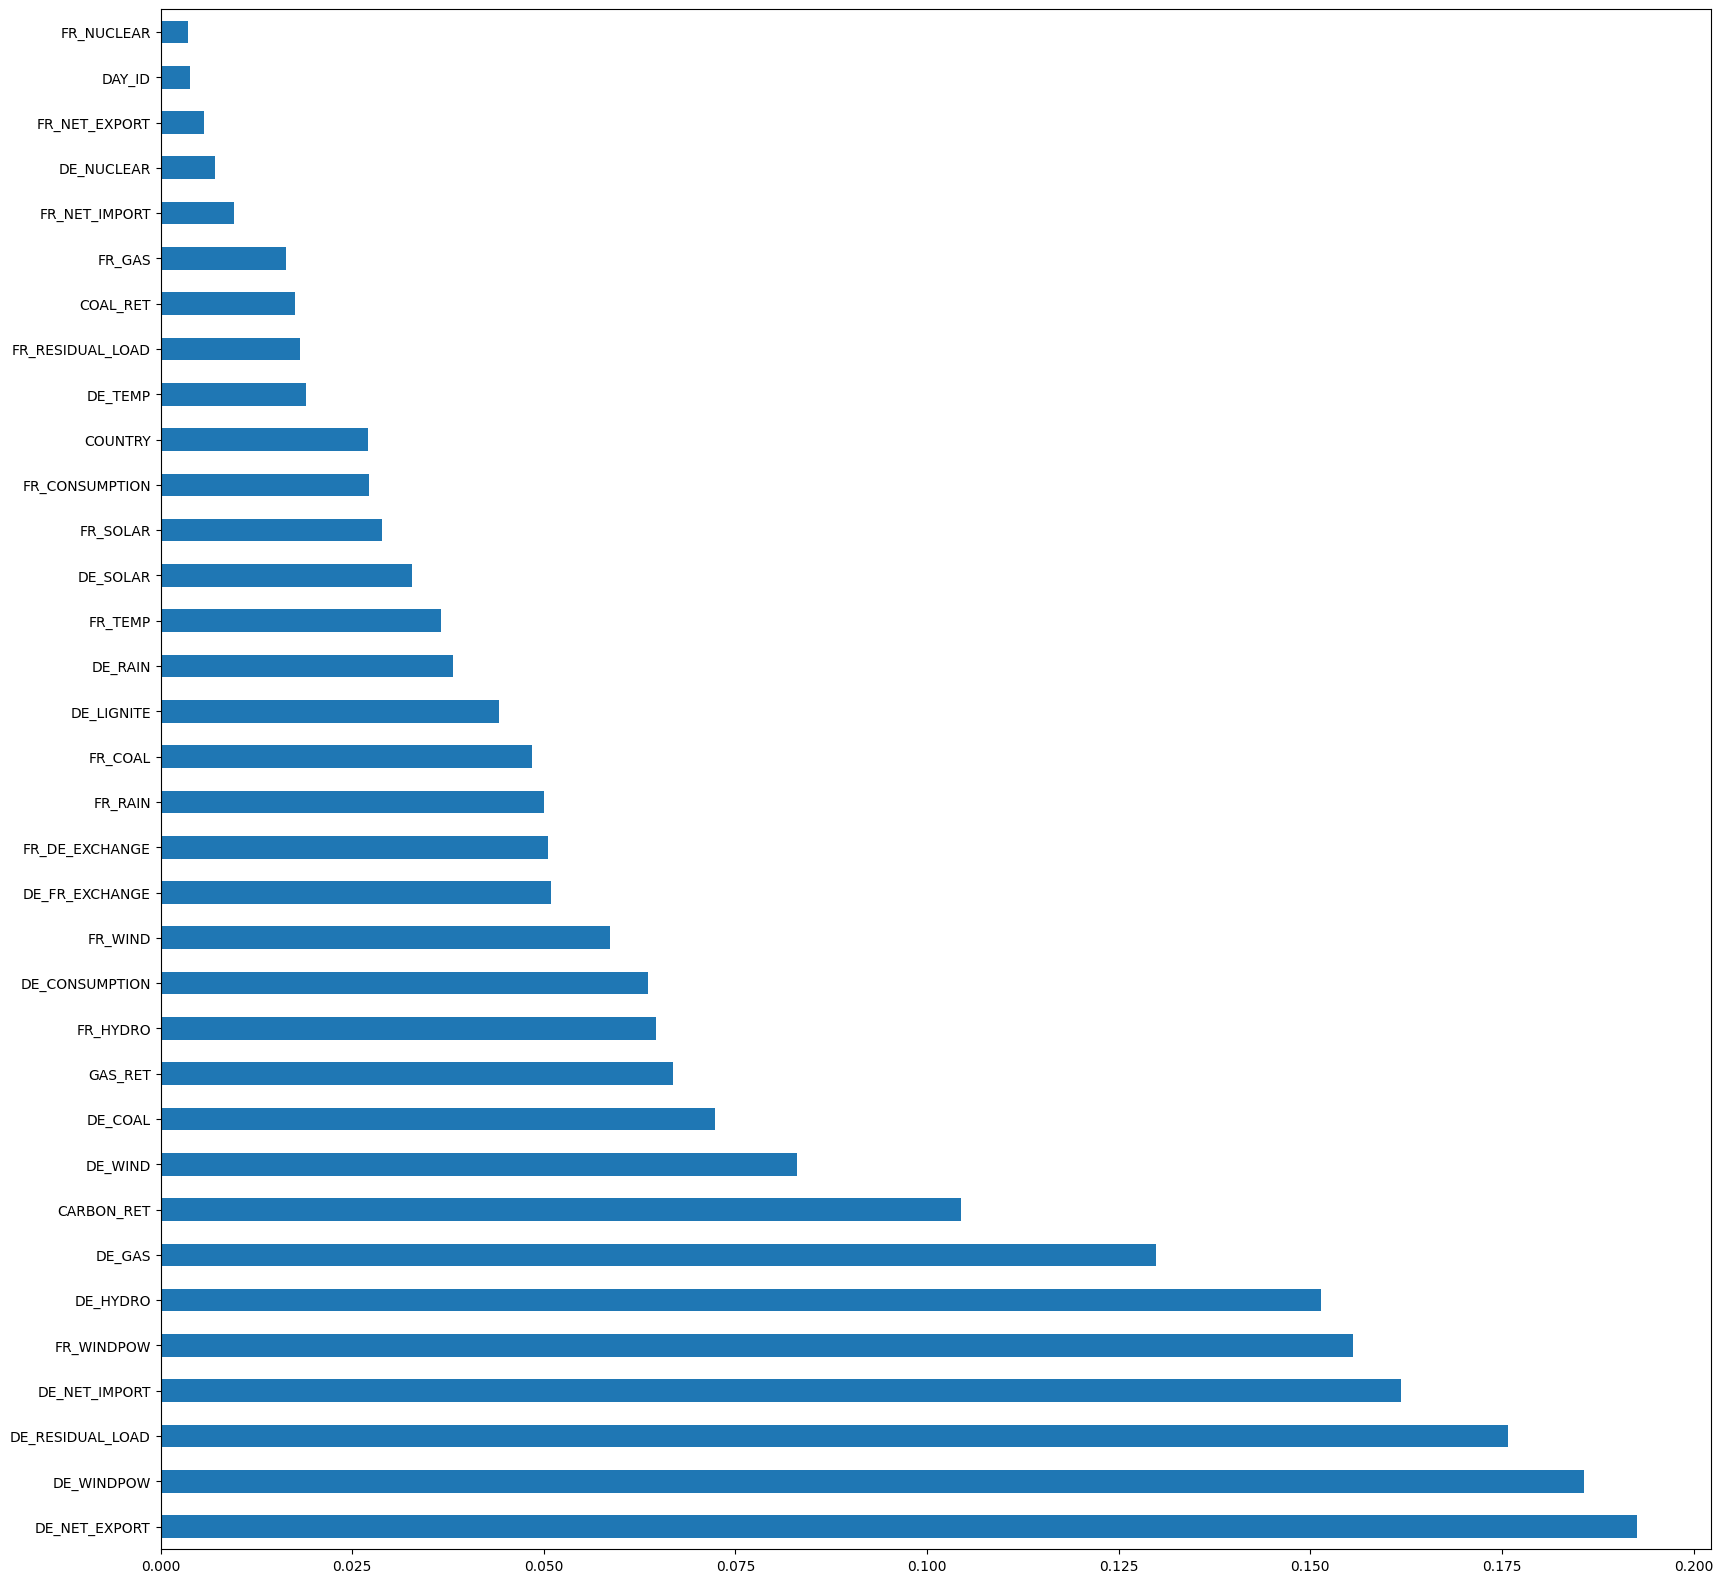

In [320]:
# Let's visualize the distribution of correlation between features and target
X_train = X_train.drop(['ID'], axis=1)
corr_matrix, _ = spearmanr(X_train, Y_train['TARGET'])
corr = pd.Series(corr_matrix[-1, :-1], index=X_train.columns).abs().sort_values(ascending=False)

plt.figure(figsize=(20, 20))
corr.plot(kind='barh')


We see that there is some variable which aren't related to our goal. We can remove the features with the lowest correlation with the target. We must remove the features and then recompute the correlation matrix and use PCA. 

In [321]:
# Before doing PCA we need to convert Country to numerical values and fill missing values of every column. We will set {FR: 1, DE: -1} and fill missing values with mean of column.
X_train['COUNTRY'] = X_train['COUNTRY'].replace('FR', 1)
X_train['COUNTRY'] = X_train['COUNTRY'].replace('DE', -1)
X_train = X_train.fillna(X_train.mean())

In [322]:
# Lets fixe a theashold to remove features that are not correlated to the target
threshold = 0.08
# Let's remove features that are not correlated to the target
X_train = X_train.drop(corr[corr < threshold].index, axis=1)
X_train

,DE_NET_EXPORT,DE_NET_IMPORT,DE_GAS,DE_HYDRO,DE_WINDPOW,FR_WINDPOW,DE_RESIDUAL_LOAD,DE_WIND,CARBON_RET
0,-0.256332,0.256332,0.441238,2.209047,-0.573370,-0.269460,0.626666,-0.790823,-0.002445
1,-0.573520,0.573520,0.174773,0.187964,-0.035514,-0.107350,-0.395469,1.522331,-0.490365
2,-0.622021,0.622021,2.351913,-0.108578,-0.298755,-0.141239,1.336625,0.431134,0.204952
3,-0.270870,0.270870,0.487818,-0.368417,-0.010090,0.366885,-1.191889,-0.499409,1.073948
4,-0.256332,0.256332,0.238693,-0.230179,-0.774941,-0.564498,0.571613,-1.088158,2.614378
...,...,...,...,...,...,...,...,...,...
1489,-0.218658,0.218658,1.810665,-0.470809,-0.057214,2.968535,1.547782,0.109480,1.320373
1490,0.449153,-0.449153,1.972779,-0.341147,0.198857,0.789618,1.358927,0.109480,0.356356
1491,-1.531544,1.531544,2.108764,0.037892,-0.981718,0.303324,1.493870,-0.594595,0.067152
1492,-0.304856,0.304856,-0.003973,-0.288150,0.378080,-0.973969,-0.137667,-0.972088,-0.843812


features: (1494, 6)


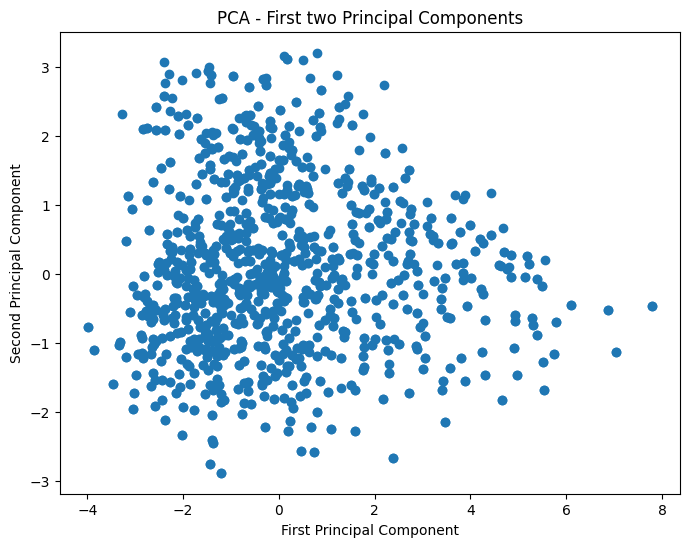

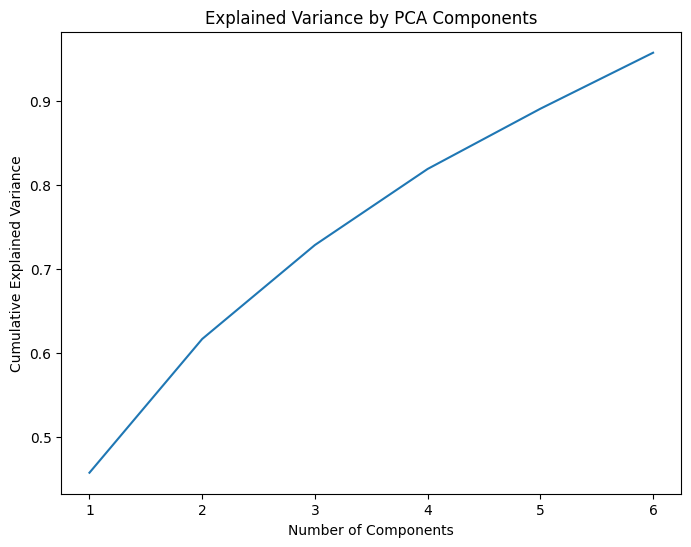

In [323]:
# Let's use PCA and visualize the result
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
# Let's normalize the data
X_train = (X_train - X_train.mean()) / X_train.std()
X_train_pca = pca.fit_transform(X_train)
print(f"features: {X_train_pca.shape}")

# Assuming X_train_pca is the result of PCA with n_components=0.95
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First two Principal Components')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

In [324]:
# Let's use the new data to train a linear regression model to begin with
# Split data into train and test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_pca, Y_train['TARGET'], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train_pca, y_train_pca)

# Evaluate the model with pearson rank correlation
y_pred = model.predict(X_test_pca)
corr = spearmanr(y_test_pca, y_pred).correlation
corr

0.21494255556870565

We get here 19% with variance=0.95. Let's try multiple value of variance to see if we can get a better result.

In [325]:


for i in range(1, 100):
    # Apply PCA
    pca = PCA(n_components=i/100)
    X_train_pca = pca.fit_transform(X_train)

    print(f"features: {X_train_pca.shape}")
    print(Y_train['TARGET'].shape)

    # Split the PCA-transformed data
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_pca, Y_train['TARGET'], test_size=0.2, random_state=42)

    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_pca, y_train_pca)

    # Predict and calculate Spearman correlation
    output_test = model.predict(X_test_pca)
    output_train = model.predict(X_train_pca)
    corr_test = spearmanr(y_test_pca, output_test).correlation
    corr_train = spearmanr(y_train_pca, output_train).correlation

    # Output the result
    print('Spearman correlation for the train set: {:.1f}%'.format(100 * corr_train))
    print('Spearman correlation for the test set: {:.1f}%'.format(100 * corr_test))
    


features: (1494, 1)
(1494,)
Spearman correlation for the train set: 22.9%
Spearman correlation for the test set: 20.0%
features: (1494, 1)
(1494,)
Spearman correlation for the train set: 22.9%
Spearman correlation for the test set: 20.0%
features: (1494, 1)
(1494,)
Spearman correlation for the train set: 22.9%
Spearman correlation for the test set: 20.0%
features: (1494, 1)
(1494,)
Spearman correlation for the train set: 22.9%
Spearman correlation for the test set: 20.0%
features: (1494, 1)
(1494,)
Spearman correlation for the train set: 22.9%
Spearman correlation for the test set: 20.0%
features: (1494, 1)
(1494,)
Spearman correlation for the train set: 22.9%
Spearman correlation for the test set: 20.0%
features: (1494, 1)
(1494,)
Spearman correlation for the train set: 22.9%
Spearman correlation for the test set: 20.0%
features: (1494, 1)
(1494,)
Spearman correlation for the train set: 22.9%
Spearman correlation for the test set: 20.0%
features: (1494, 1)
(1494,)
Spearman correlation

We keep 0.97 as best value for Linear Regression. For more complex model we might want to keep less features to avoid overfitting.

In [326]:
pca = PCA(n_components=0.97)
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)
# Let's use the new data to train a linear regression model to begin with
# Split data into train and test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_pca, Y_train['TARGET'], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train_pca, y_train_pca)

# Evaluate the model with pearson rank correlation
y_pred = model.predict(X_test_pca)
corr = spearmanr(y_test_pca, y_pred).correlation
corr

(1494, 7)


0.19627131944490703

In [327]:
# Let's get our prediction and summit it to the public leaderboard
# Get data
X_test = pd.read_csv('../data/X_test.csv')
X_train = pd.read_csv('../data/X_train.csv')

# Replace categorical values with numerical values and fill missing values with mean
X_train['COUNTRY'] = X_train['COUNTRY'].replace('FR', 1)
X_train['COUNTRY'] = X_train['COUNTRY'].replace('DE', -1)
X_test['COUNTRY'] = X_test['COUNTRY'].replace('FR', 1)
X_test['COUNTRY'] = X_test['COUNTRY'].replace('DE', -1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Remove ID column
X_train = X_train.drop(['ID'], axis=1)
X_test = X_test.drop(['ID'], axis=1)

# Remove features that are not correlated to the target
corr_matrix, _ = spearmanr(X_train, Y_train['TARGET'])
corr = pd.Series(corr_matrix[-1, :-1], index=X_train.columns).abs().sort_values(ascending=False)
threshold = 0.08
X_test = X_test.drop(corr[corr < threshold].index, axis=1)
X_train = X_train.drop(corr[corr < threshold].index, axis=1)

# Apply PCA
X_test = (X_test - X_train.mean()) / X_train.std()
X_test_pca = pca.transform(X_test)

# Predict
y_pred = model.predict(X_test_pca)
y_pred = pd.DataFrame(y_pred, columns=['TARGET'])

# Save to csv
X_test = pd.read_csv('../data/X_test.csv')
y_pred = X_test[['ID']].copy()
y_pred['TARGET'] = model.predict(X_test_pca)
y_pred.to_csv('../data/analyse_linear.csv', index=False)

We can try to see if it's efficient to do two separate models for Germany and France. Let's see if it's a promesing idea.

In [328]:
X_train = pd.read_csv('../data/X_train.csv')
Y_train = pd.read_csv('../data/Y_train.csv')

# Deal with missing values and categorical values
X_train_de = X_train[X_train['COUNTRY'] == "DE"]
X_train_fr = X_train[X_train['COUNTRY'] == "FR"]
Y_train_de = Y_train[X_train['COUNTRY'] == "DE"]
Y_train_fr = Y_train[X_train['COUNTRY'] == "FR"]
X_train_de = X_train_de.fillna(X_train_de.mean())
X_train_fr = X_train_fr.fillna(X_train_fr.mean())
X_train_de = X_train_de.drop(['COUNTRY', 'ID'], axis=1)
X_train_fr = X_train_fr.drop(['COUNTRY', 'ID'], axis=1)

# Remove features that are not correlated to the target
threshold = 0.08
corr_matrix, _ = spearmanr(X_train_de, Y_train_de['TARGET'])
corr = pd.Series(corr_matrix[-1, :-1], index=X_train_de.columns).abs().sort_values(ascending=False)
X_train_de = X_train_de.drop(corr[corr < threshold].index, axis=1)
corr_matrix, _ = spearmanr(X_train_fr, Y_train_fr['TARGET'])
corr = pd.Series(corr_matrix[-1, :-1], index=X_train_fr.columns).abs().sort_values(ascending=False)
X_train_fr = X_train_fr.drop(corr[corr < threshold].index, axis=1)

print(X_train_de.shape)
print(X_train_fr.shape)

X_train_de = (X_train_de - X_train_de.mean()) / X_train_de.std()
X_train_fr = (X_train_fr - X_train_fr.mean()) / X_train_fr.std()

pca_de = PCA(n_components=0.97)
pca_fr = PCA(n_components=0.97)
X_train_de_pca = pca_de.fit_transform(X_train_de)
X_train_fr_pca = pca_fr.fit_transform(X_train_fr)

# Let's use the new data to train a linear regression model to begin with
# Split data into train and test
X_train_de_pca, X_test_de_pca, y_train_de_pca, y_test_de_pca = train_test_split(X_train_de_pca, Y_train_de['TARGET'], test_size=0.2, random_state=42)
X_train_fr_pca, X_test_fr_pca, y_train_fr_pca, y_test_fr_pca = train_test_split(X_train_fr_pca, Y_train_fr['TARGET'], test_size=0.2, random_state=42)

# Train the model
model_de = LinearRegression()
model_fr = LinearRegression()
model_de.fit(X_train_de_pca, y_train_de_pca)
model_fr.fit(X_train_fr_pca, y_train_fr_pca)

# Evaluate the model with pearson rank correlation
y_pred_de = model_de.predict(X_test_de_pca)
y_pred_fr = model_fr.predict(X_test_fr_pca)
corr_de = spearmanr(y_test_de_pca, y_pred_de).correlation
corr_fr = spearmanr(y_test_fr_pca, y_pred_fr).correlation
print(f"corr_de: {corr_de}")
print(f"corr_fr: {corr_fr}")
corr = (corr_de + corr_fr) / 2
print(f"corr: {corr}")


(643, 14)
(851, 5)
corr_de: 0.34229092128801436
corr_fr: 0.19352016795079202
corr: 0.2679055446194032


/var/folders/k7/5bqh6vbs2jg9btyl5pw1cyqr0000gn/T/ipykernel_99598/28067246.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train_de = X_train_de.fillna(X_train_de.mean())
/var/folders/k7/5bqh6vbs2jg9btyl5pw1cyqr0000gn/T/ipykernel_99598/28067246.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train_fr = X_train_fr.fillna(X_train_fr.mean())


It's seem indeed to be a good idea.

Our features are good but now we need to find the best model to use. We should try other regression algorithm than the simple linearRegression. We can try:
    - Ridge regression
    - Lasso regression
    - ElasticNet regression
    - Random Forest regression
    - Gradient Boosting regression
    - SVM regression
    - Neural Network regression

In [343]:
# Let's make a simple neural network

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

class Net(nn.Module):
    def __init__(self, input_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_features, 12)  # input_features should be the number of features in your dataset
        self.fc3 = nn.Linear(input_features, 1)  # Output layer for regression

    def forward(self, x):
        #x = torch.relu(self.fc1(x))
        x = self.fc3(x)
        return x
    
device = torch.device('mps')
epochs = 100
criterion = nn.MSELoss()  # Mean Squared Error Loss

# Convert your dataset to PyTorch tensors
X_train_de_pca_tensor = torch.tensor(X_train_de_pca, dtype=torch.float32).to(device)
X_train_fr_pca_tensor = torch.tensor(X_train_fr_pca, dtype=torch.float32).to(device)
Y_train_de_tensor = torch.tensor(y_train_de_pca.values, dtype=torch.float32).to(device)
Y_train_fr_tensor = torch.tensor(y_train_fr_pca.values, dtype=torch.float32).to(device)
model_de = Net(X_train_de_pca_tensor.shape[1]).to(device)
model_fr = Net(X_train_fr_pca_tensor.shape[1]).to(device)
optimizer_de = optim.AdamW(model_de.parameters(), lr=1e-2)
optimizer_fr = optim.AdamW(model_fr.parameters(), lr=1e-2)
scheduler_de = CosineAnnealingLR(optimizer_de, T_max = epochs, eta_min = 1e-4)
scheduler_fr = CosineAnnealingLR(optimizer_fr, T_max = epochs, eta_min = 1e-4)

# Training loop
for epoch in range(epochs):  # Number of epochs
    optimizer_de.zero_grad()
    optimizer_fr.zero_grad()
    outputs_de = model_de(X_train_de_pca_tensor)
    outputs_fr = model_fr(X_train_fr_pca_tensor)
    loss_de = criterion(outputs_de, Y_train_de_tensor)
    loss_fr = criterion(outputs_fr, Y_train_fr_tensor)
    loss_fr.backward()
    loss_de.backward()
    optimizer_de.step()
    optimizer_fr.step()
    scheduler_de.step()
    scheduler_fr.step()
    print(f'Epoch {epoch+1}, Loss: {loss_de.item()}')
    print(f'Epoch {epoch+1}, Loss: {loss_fr.item()}')

X_test_de_pca_tensor = torch.tensor(X_test_de_pca, dtype=torch.float32).to(device)
X_test_fr_pca_tensor = torch.tensor(X_test_fr_pca, dtype=torch.float32).to(device)

y_pred_de = model_de(X_test_de_pca_tensor).cpu().detach().numpy()
y_pred_fr = model_fr(X_test_fr_pca_tensor).cpu().detach().numpy()
corr_de = spearmanr(y_test_de_pca.values, y_pred_de).correlation
corr_fr = spearmanr(y_test_fr_pca.values, y_pred_fr).correlation
print(f"corr_de: {corr_de}")
print(f"corr_fr: {corr_fr}")
corr = (corr_de + corr_fr) / 2
print(f"corr: {corr}")

Epoch 1, Loss: 1.6041752099990845
Epoch 1, Loss: 1.4710335731506348
Epoch 2, Loss: 1.5587413311004639
Epoch 2, Loss: 1.4371637105941772
Epoch 3, Loss: 1.5164247751235962
Epoch 3, Loss: 1.404536247253418
Epoch 4, Loss: 1.4771887063980103
Epoch 4, Loss: 1.3731852769851685
Epoch 5, Loss: 1.4408819675445557
Epoch 5, Loss: 1.3431390523910522
Epoch 6, Loss: 1.407384991645813
Epoch 6, Loss: 1.3144203424453735
Epoch 7, Loss: 1.3766533136367798
Epoch 7, Loss: 1.2870469093322754
Epoch 8, Loss: 1.348638892173767
Epoch 8, Loss: 1.2610294818878174
Epoch 9, Loss: 1.3232547044754028
Epoch 9, Loss: 1.236373782157898
Epoch 10, Loss: 1.3003709316253662
Epoch 10, Loss: 1.213078498840332
Epoch 11, Loss: 1.279820442199707
Epoch 11, Loss: 1.1911362409591675
Epoch 12, Loss: 1.2614120244979858
Epoch 12, Loss: 1.170533537864685
Epoch 13, Loss: 1.2449508905410767
Epoch 13, Loss: 1.1512510776519775
Epoch 14, Loss: 1.2302614450454712
Epoch 14, Loss: 1.1332623958587646
Epoch 15, Loss: 1.2171963453292847
Epoch 15, 

As we can excepted with as little sampled it's complicate to train a neural network. We will try other model.